# Finding the Best Markets to Advertise In an E-learning Product

In this project we are going to find the best markets to advertise in an e-learning product, such as programming courses. Most of the courses are about web and mobile development, but there are also other domains liek e.g. data science or game development.

**Our goal is to find two best markets to advertise the product in.**

## Exploring the data 

In this project we will use freeCodeCamp's 2017 New Coder Survey (https://github.com/freeCodeCamp/2017-new-coder-survey/blob/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv). FreeCodeCamp is a platform that offers courses on web development, their survey attracted new programmers with not only web development interest, which will be useful for our analysis. 

In [1]:
import pandas as pd
fcc_survey = pd.read_csv(r"Data\2017-fCC-New-Coders-Survey-Data.csv", low_memory=0)
pd.options.display.max_columns=150
print(fcc_survey.shape)
fcc_survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Clarify representative for our population

During our analysis we would like to answer the following questions:
- Where are new coders located?
- What are the locations with the greatest number of new coders?
- How much money new coders are willing to spend on learning?

First we will clarify whether the sample data is representative for our population.

In [2]:
fcc_survey["JobRoleInterest"].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                       11.770595
  Front-End Web Developer                                                                                                                                                       6.435927
  Data Scientist                                                                                                                                                                2.173913
Back-End Web Developer                                                                                                                                                          2.030892
  Mobile Developer                                                                                                                                                              1.673341
Game Developer                                                             

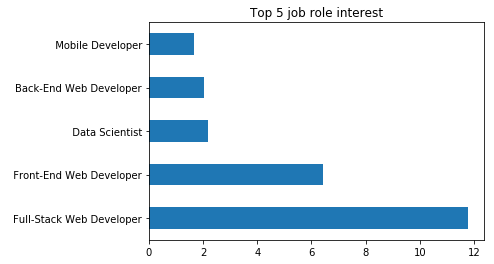

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
top_5_roles = fcc_survey["JobRoleInterest"].value_counts(normalize=True).head(5)*100
top_5_roles.plot.barh()
plt.title("Top 5 job role interest")
plt.show()

From the frequency table above we can observe that:
- most of people are interested in web development (4 out of top 5 job roles are related to the web development)
- the most popular job role is full-stack web developer
- less than 2% of people are interested in mobile development
- many respondents are interested in more than just one job role

Next we will find out the frequency of different number of job roles that respondents are interested in.

In [4]:
#First we will drop rows with missing values
job_roles = fcc_survey["JobRoleInterest"].dropna()

#Now let's split job roles
job_roles = job_roles.str.split(',')

#We will count number of job roles for each respondent
num_job_roles = []
for r in job_roles:
    num_job_roles.append(len(r))
    
#Finally let's create frequency table
job_roles_dict = {}
for n in num_job_roles:
    job_roles_dict[n] = num_job_roles.count(n) / len(num_job_roles)*100
job_roles_dict

{1: 31.650457665903893,
 2: 10.883867276887873,
 3: 15.889588100686499,
 4: 15.217391304347828,
 5: 12.04233409610984,
 6: 6.721967963386728,
 7: 3.8615560640732265,
 8: 1.7591533180778032,
 9: 0.9868421052631579,
 10: 0.47196796338672775,
 11: 0.1859267734553776,
 12: 0.3003432494279176,
 13: 0.028604118993135013}

It looks like only 31.7% of responders know exactly what kind of job role the are interested in. As the profile of our e-learning platform is for web development and mobile development, let's verify how many respondents are interested in at least one of them.

In [5]:
web_or_mobile = fcc_survey["JobRoleInterest"].dropna().str.contains('Web Developer|Mobile Developer')
web_or_mobile.value_counts(normalize=True)*100

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

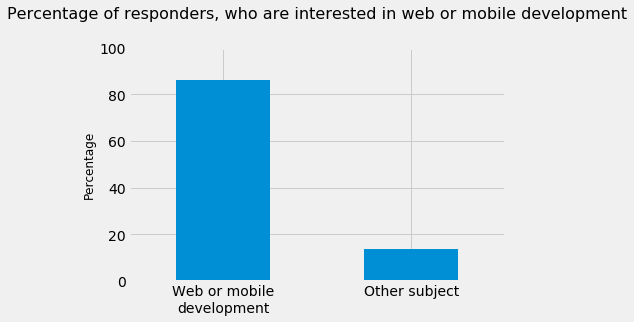

In [11]:
#Let's create bar plot
freq_table = web_or_mobile.value_counts(normalize=True)*100
plt.style.use("fivethirtyeight")
freq_table.plot.bar()
plt.ylabel("Percentage", fontsize=12)
plt.title("Percentage of responders, who are interested in web or mobile development", y=1.1, fontsize=16)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylim(0,100)
plt.show()

Over 86% of responders are interested in either web or mobile development. Thus this sample is good representation of our population, as our platform will be mainly for people interested in web and mobile development. It's time to find the answers for our questions:
- Where are new coders located?
- What are the locations with the greatest number of new coders?
- How much money new coders are willing to spend on learning?

## Where are new coders located? What are the locations with the greatest number of new coders?

From data we can get information about country of each participant as the location. The CountryCitizen variable describes the country of origin for each participant, and the CountryLive variable describes what country each participants lives in (which may be different than the origin country). We will focuse on CountryLive. We will analyze only this participants who answered what role they are interested in. Let's check the frequency distribution table of the CountryLive variabl.

In [20]:
participants_with_role = fcc_survey[fcc_survey["JobRoleInterest"].notnull()].copy()
absolute_freq = participants_with_role["CountryLive"].value_counts().head(10)

In [21]:
#Let's generate frequency table for normalized values
relative_freq = participants_with_role["CountryLive"].value_counts(normalize=True).head(10)*100

In [22]:
pd.DataFrame(data={"Absolute Frequency":absolute_freq,
            "Relative Frequency":relative_freq}
            )

,Absolute Frequency,Relative Frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


Defenitly U.S.A. is big market to target our advertisement (45% share). The second biggest market is India with 7.7%, but 3rd UK and 4th Canada are pretty close to India with respectively 4.6% and 3.8%. Our next step will be to find the answer for the question, how much money new coders are willing to spend on learning.

## How much money new coders are willing to spend on learning?

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

In our analysis we will focus only on four countries: the US, India, the United Kingdom, and Canada. They have the highest absolute frequencies and English in an official language there (our courses are written in English as well).

In [27]:
participants_with_role["MonthsProgramming"].replace(0,1, inplace=True)
participants_with_role["MoneyPerMonth"] = participants_with_role["MoneyForLearning"] / participants_with_role["MonthsProgramming"]
participants_with_role["MoneyPerMonth"].isnull().sum()

675

In [28]:
#Let's remove rows with 'MoneyPerMonth' value equals 0
participants_with_role = participants_with_role[participants_with_role["MoneyPerMonth"].notnull()]
participants_with_role["MoneyPerMonth"].isnull().sum()

0

In [29]:
#We will group the spending by 4 countries we mentioned before
participants_with_role = participants_with_role[participants_with_role["CountryLive"].notnull()]
countries_mean = participants_with_role.groupby("CountryLive").mean()
countries_mean["MoneyPerMonth"][["United States of America", "India", "United Kingdom", "Canada"]]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

Our calculation confirmed that U.S.A. is a good market for our courses. The money per month spent in India, UK and Canada are different than we would expect. India with way smaller average income per person has much higher spendings on courses than UK or Canada. The reason might be outliers, which make the mean too large for India or too small for UK and Canada.

## Verifying Outliers

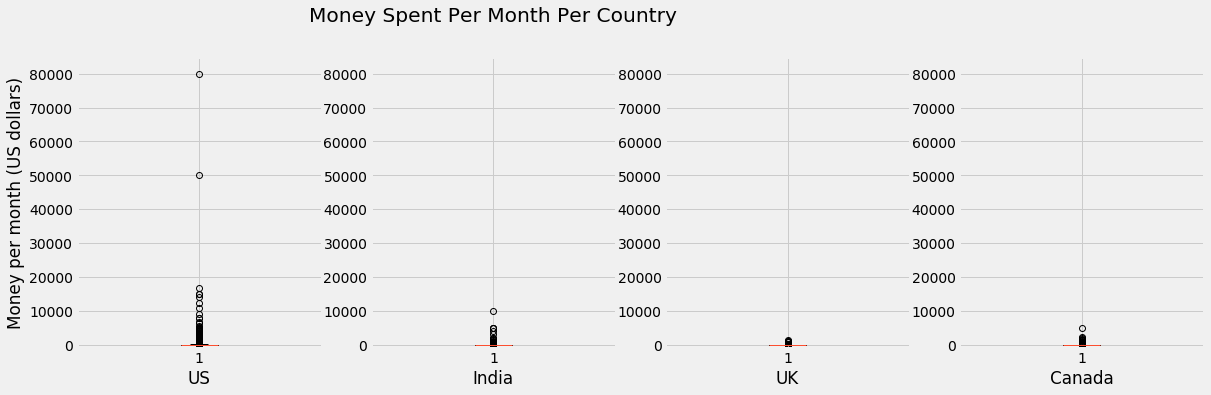

In [75]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(141)
ax1.boxplot(participants_with_role.loc[participants_with_role["CountryLive"]=="United States of America","MoneyPerMonth"])
ax1.set_ylim(-1000,85000)
plt.ylabel("Money per month (US dollars)")
plt.xlabel('US')

ax2 = fig.add_subplot(142)
ax2.boxplot(participants_with_role.loc[participants_with_role["CountryLive"]=="India","MoneyPerMonth"])
ax2.set_ylim(-1000,85000)
plt.title("Money Spent Per Month Per Country", y =1.1)
plt.xlabel('India')

ax3 = fig.add_subplot(143)
ax3.boxplot(participants_with_role.loc[participants_with_role["CountryLive"]=="United Kingdom","MoneyPerMonth"])
ax3.set_ylim(-1000,85000)
plt.xlabel('UK')

ax4 = fig.add_subplot(144)
ax4.boxplot(participants_with_role.loc[participants_with_role["CountryLive"]=="Canada","MoneyPerMonth"])
ax4.set_ylim(-1000,85000)
plt.xlabel('Canada')

plt.show()

From the box plots above we can observe that data for US have at least 2 outliers. Spending 80000 USD or 50000 USD a month doesn't sound correct. We will start with removing rows with money spend per month greater than 20000 USD. Then we will investigate again mean values and box plots.

In [77]:
fcc_clean = participants_with_role[participants_with_role["MoneyPerMonth"]<20000]
sum(fcc_clean["MoneyPerMonth"]>20000)

0

In [78]:
countries_mean = fcc_clean.groupby('CountryLive').mean()
countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

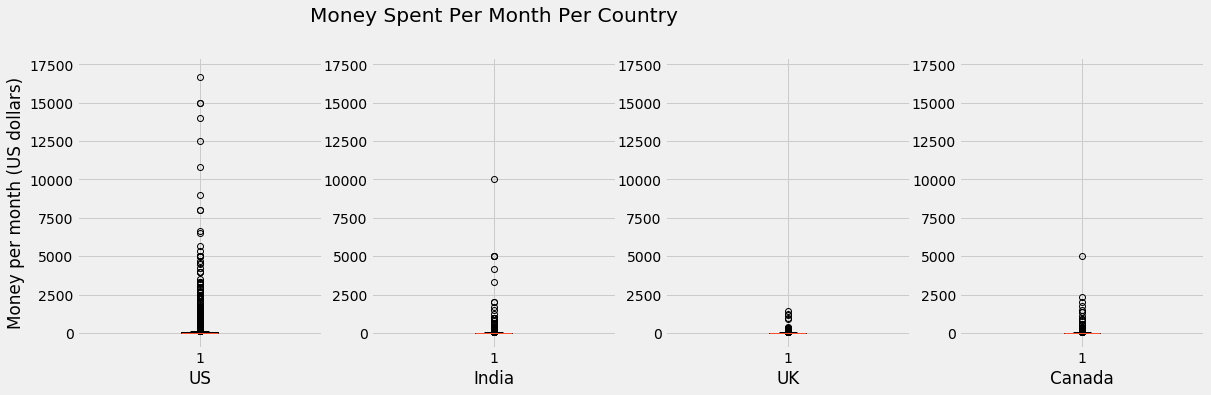

In [83]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(141)
ax1.boxplot(fcc_clean.loc[fcc_clean["CountryLive"]=="United States of America","MoneyPerMonth"])
ax1.set_ylim(-1000,18000)
plt.ylabel("Money per month (US dollars)")
plt.xlabel('US')

ax2 = fig.add_subplot(142)
ax2.boxplot(fcc_clean.loc[fcc_clean["CountryLive"]=="India","MoneyPerMonth"])
ax2.set_ylim(-1000,18000)
plt.title("Money Spent Per Month Per Country", y =1.1)
plt.xlabel('India')

ax3 = fig.add_subplot(143)
ax3.boxplot(fcc_clean.loc[fcc_clean["CountryLive"]=="United Kingdom","MoneyPerMonth"])
ax3.set_ylim(-1000,18000)
plt.xlabel('UK')

ax4 = fig.add_subplot(144)
ax4.boxplot(fcc_clean.loc[fcc_clean["CountryLive"]=="Canada","MoneyPerMonth"])
ax4.set_ylim(-1000,18000)
plt.xlabel('Canada')

plt.show()

It looks like there might be some outliers that impact mean value for India. So far we can't be sure, so let's investigate it.

In [85]:
#We will verify over 2500USD spent per month in India
fcc_clean[(fcc_clean["CountryLive"]=="India") & (fcc_clean["MoneyPerMonth"]>2500)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,

It looks like this participants didn't attend the expensive Bootcamps. It's hard to define if this data is correct, that's why we are going to remove this rows. 

In [86]:
india_outliers = fcc_clean[(fcc_clean["CountryLive"]=="India") & (fcc_clean["MoneyPerMonth"]>2500)]
fcc_clean = fcc_clean.drop(india_outliers.index)

Now let's check outliers for U.S.A., which are points with over 6000 USD spent per month.

In [87]:
usa_outliers = fcc_clean[(fcc_clean["CountryLive"]=="United States of America") & (fcc_clean["MoneyPerMonth"]>6000)]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Six people from our outliers attended bootcamps, which could be the reason why they spent a lot of money on learning. From those who attended bootcamps we can also distinguish poeple, who had been programming for no more than three months when they completed the survey. They paid a lot of money, but they will be learning for several months without additional payments. In consequence, we will remove rows with respondents, who: didn't attend any bootcamp and had been programming for three months or less.

In [91]:
no_bootcamp = fcc_clean[(fcc_clean["CountryLive"]=="United States of America") 
                        & (fcc_clean["MoneyPerMonth"]>6000) 
                        & (fcc_clean["AttendedBootcamp"]==0.0)
                       ]

fcc_clean = fcc_clean.drop(no_bootcamp.index)


three_months_programming = fcc_clean[(fcc_clean["CountryLive"]=="United States of America") 
                        & (fcc_clean["MoneyPerMonth"]>6000) 
                        & (fcc_clean["MonthsProgramming"]<=3)
                       ]
fcc_clean = fcc_clean.drop(three_months_programming.index)

Let's also investigate outlier from Canda, who spent 5000 USD per month.

In [93]:
canada_outlier = fcc_clean[(fcc_clean["CountryLive"]=="Canada") & (fcc_clean["MoneyPerMonth"]>4000)]
canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This responder attended a bootcamp, but is programming less than 3 months. Following the same approach as for U.S.A. we will remove this row.

In [94]:
canada_three_months = fcc_clean[(fcc_clean["CountryLive"]=="Canada") 
                        & (fcc_clean["MoneyPerMonth"]>4000) 
                        & (fcc_clean["MonthsProgramming"]<=3)
                       ]
fcc_clean = fcc_clean.drop(canada_three_months.index)

Let's calculate one more time mean values and generate box plots.

In [95]:
countries_mean = fcc_clean.groupby('CountryLive').mean()
countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: MoneyPerMonth, dtype: float64

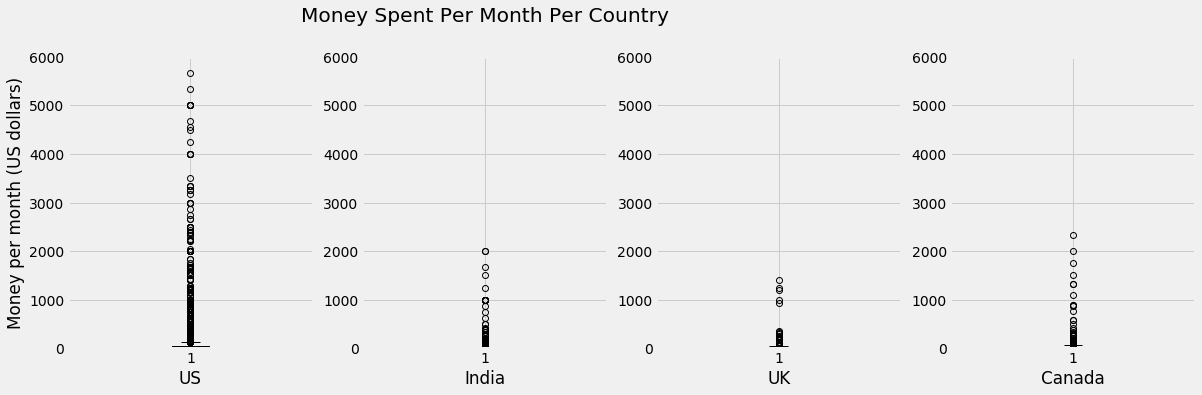

In [98]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(141)
ax1.boxplot(fcc_clean.loc[fcc_clean["CountryLive"]=="United States of America","MoneyPerMonth"])
ax1.set_ylim(0,6000)
plt.ylabel("Money per month (US dollars)")
plt.xlabel('US')

ax2 = fig.add_subplot(142)
ax2.boxplot(fcc_clean.loc[fcc_clean["CountryLive"]=="India","MoneyPerMonth"])
ax2.set_ylim(0,6000)
plt.title("Money Spent Per Month Per Country", y =1.1)
plt.xlabel('India')

ax3 = fig.add_subplot(143)
ax3.boxplot(fcc_clean.loc[fcc_clean["CountryLive"]=="United Kingdom","MoneyPerMonth"])
ax3.set_ylim(0,6000)
plt.xlabel('UK')

ax4 = fig.add_subplot(144)
ax4.boxplot(fcc_clean.loc[fcc_clean["CountryLive"]=="Canada","MoneyPerMonth"])
ax4.set_ylim(0,6000)
plt.xlabel('Canada')

plt.show()

## Two best markets to advertise the product in

Let's just remind the share of each country in the number of new coders.

In [110]:
top_countries = fcc_clean[fcc_clean['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
top_countries['CountryLive'].value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

- Defenietly number one market to advertise the e-learning course is U.S.A. They have 75% of responders (calculated just from top 4 countries) and people are willing to pay the highest amount, which is 143 USD per month.
- As a second market we would consider either India or Canada. Canada has higher money spent per month (93 USD for Canada vs 66 USD for India), but it looks like Indian market is bigger (12% of responders in India vs 6% in Canada). Thus our final recommendations are:
    - **Invest in 3 markets** (e.g. based on market share: **U.S.A. - 75%, India - 17%, Canada - 8% or based on money spent per month: U.S.A. - 47%, Canada - 31%, India - 22%**)
    - **Invest in 2 markets** (due to fact that Canadian market is similar to U.S.A. market, which might reduce marketing costs and Canadian customers are willing to pay more per month than Indian customers, we recommend to invest in: **U.S.A. - 75% and Canada 25%**)